Kaggle_project_link:https://www.kaggle.com/c/bike-sharing-demand/data

#### Problem Statement- 
Bike-sharing system are meant to rent the bicycle and return to the different place for the bike sharing purpose in Washington DC. You are provided with rental data spanning for 2 years. You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period.

In [50]:
import warnings
warnings.filterwarnings('ignore')

In [51]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Reading train and test data

In [52]:
train=pd.read_csv("train_bikes.csv", parse_dates=['datetime']) 

test=pd.read_csv('test_bikes.csv',parse_dates=['datetime'])


In [53]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [54]:
train.weather.unique()

array([1, 2, 3, 4], dtype=int64)

In [55]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


## Data Description
#### datetime         :   Date ,day ,year and Time stamp
#### season           :  (1:spring , 2:Summer ,3: Fall ,4: winter)
#### Holiday           :  (0: not holiday,1: Holiday)
#### workingday    :  (0: not workingday,1: workingday)
#### weather          :  1: Clear, Few clouds, Partly cloudy, Partly cloudy
####                            2: Mist + Cloudy, Mist + Broken clouds, Mist  Few clouds,Mist
####                            3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
####                            4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
#### temp               :  temperature in celcius
#### atemp             :  asset temperature
#### humidity         :  relative humidity
#### windspeed     :  wind speed
#### casual            :  number of non-registered user rentals initiated
#### registered      :  number of registered user rentals initiated
#### count              :  number of total rentals


In [56]:
  train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


If we observe we have all numerical features 

#### Analyzing Numerical features

In [57]:
train['datetime'].dt.year.unique()

array([2011, 2012], dtype=int64)

In [58]:

train_11_year=2011
train_11=train[train.datetime.dt.year==train_11_year]

train_12_year=2012
train_12=train[train['datetime'].dt.year==train_12_year]

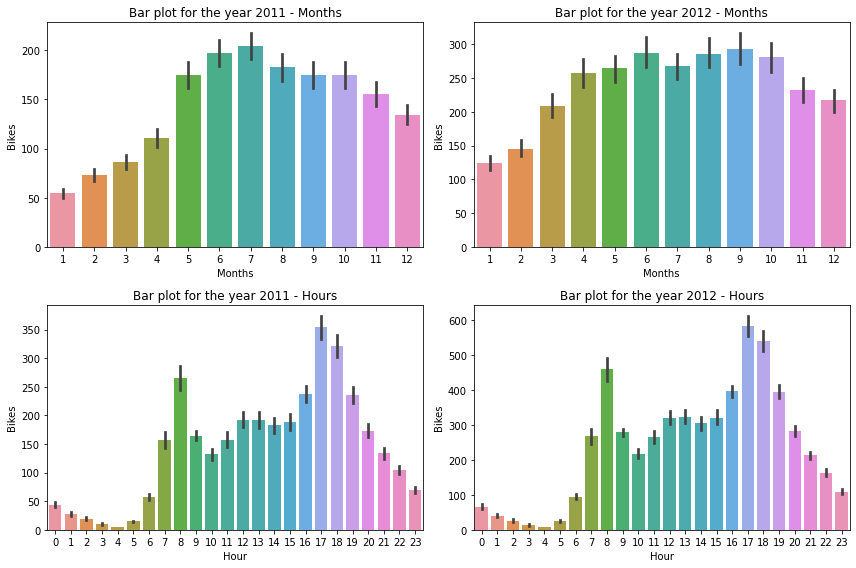

In [59]:

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.barplot(x=train_11['datetime'].dt.month, y=train_11['count'], ax=axes[0, 0])
axes[0, 0].set_title("Bar plot for the year 2011 - Months")
axes[0, 0].set_xlabel('Months')
axes[0, 0].set_ylabel('Bikes')

sns.barplot(x=train_12['datetime'].dt.month, y=train_12['count'], ax=axes[0, 1])
axes[0, 1].set_title("Bar plot for the year 2012 - Months")
axes[0, 1].set_xlabel('Months')
axes[0, 1].set_ylabel('Bikes')

sns.barplot(x=train_11['datetime'].dt.hour, y=train_11['count'], ax=axes[1, 0])
axes[1, 0].set_title("Bar plot for the year 2011 - Hours")
axes[1, 0].set_xlabel('Hour')
axes[1, 0].set_ylabel('Bikes')

sns.barplot(x=train_12['datetime'].dt.hour, y=train_12['count'], ax=axes[1, 1])
axes[1, 1].set_title("Bar plot for the year 2012 - Hours")
axes[1, 1].set_xlabel('Hour')
axes[1, 1].set_ylabel('Bikes')

plt.tight_layout()
plt.show()


If We Observe in the trends the bikes count has been Increased from 2011 to 2012 and  in 
July and September most of sales is taking places and with the hours we are seeing more bike rentals in evening time

<AxesSubplot:xlabel='windspeed', ylabel='count'>

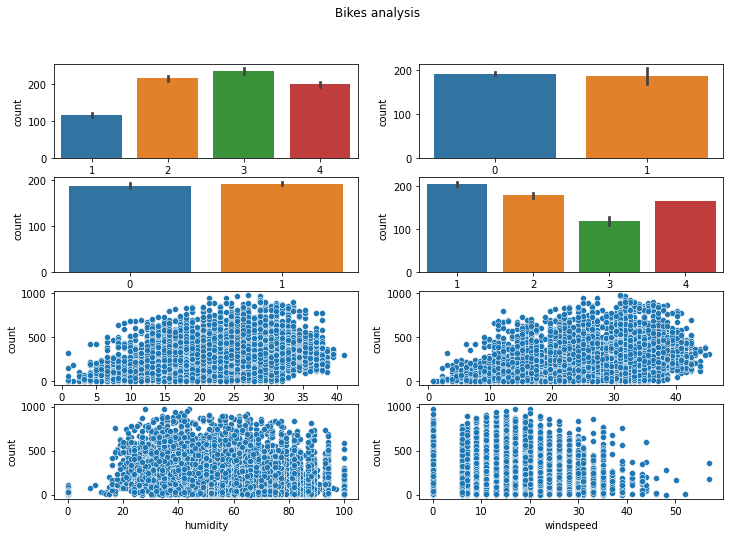

In [60]:
fig,axes=plt.subplots(4,2,figsize=(12,8))
fig.suptitle("Bikes analysis")
sns.barplot(ax=axes[0,0],x='season',y='count',data=train)
sns.barplot(ax=axes[0,1],x='holiday',y='count',data=train)
sns.barplot(ax=axes[1,0],x='workingday',y='count',data=train)
sns.barplot(ax=axes[1,1],x='weather',y='count',data=train)
sns.scatterplot(ax=axes[2,0],x='temp',y='count',data=train)
sns.scatterplot(ax=axes[2,1],x='atemp',y='count',data=train)
sns.scatterplot(ax=axes[3,0],x='humidity',y='count',data=train)
sns.scatterplot(ax=axes[3,1],x='windspeed',y='count',data=train)


-The key takeaway here is that most of rentals happening in Season 2,Season 3 Summer and fall the reason may be
because of fall colors and summmer Vacation 

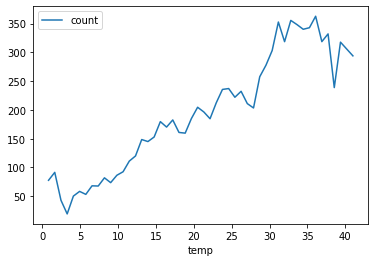

In [61]:
temp_ = train.groupby('temp')[['count']].mean()
temp_.plot()
plt.show()

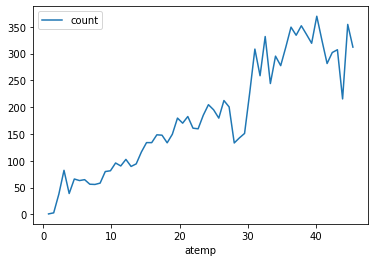

In [62]:
atemp_ = train.groupby('atemp')[['count']].mean()
atemp_.plot()
plt.show()

#### Missing value check:

In [63]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

#### outlier check:

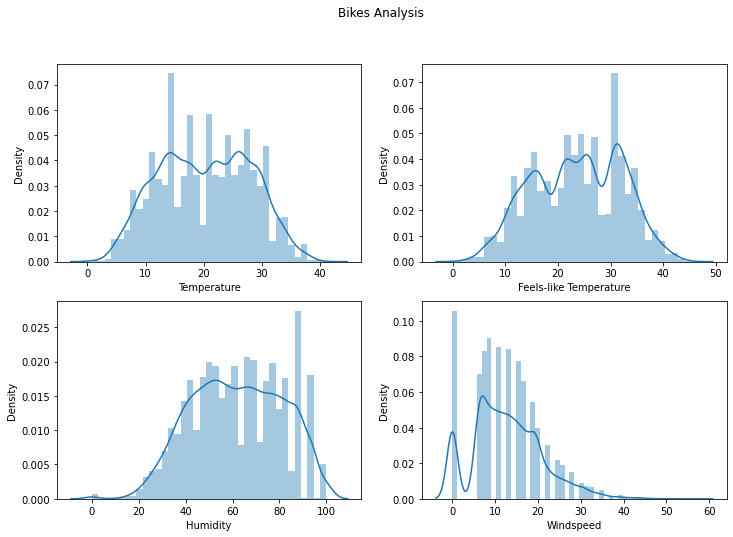

In [64]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Bikes Analysis")
sns.distplot(train['temp'], ax=axes[0, 0,], label="temp")
axes[0, 0].set_xlabel('Temperature')

sns.distplot(train['atemp'], ax=axes[0, 1], label="atemp")
axes[0, 1].set_xlabel('Feels-like Temperature')

sns.distplot(train['humidity'], ax=axes[1, 0], label='humidity')
axes[1, 0].set_xlabel('Humidity')

sns.distplot(train['windspeed'], ax=axes[1, 1], label='windspeed')
axes[1, 1].set_xlabel('Windspeed')

plt.show()

Here We data of temp,atemp,humidity follows normal Distribution ,Where as Windspeed is has right skweed so 
we need to handle it in later stages 

#### As We see in our test data we don't require any of casual and registered features so we can remove them 

Here we can convert our date into months and hours column and drop date variable 

In [65]:
train['hour']=train['datetime'].dt.hour
train['month']=train['datetime'].dt.month

In [66]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1


We'll try to implement column creation to following test case data too 

In [67]:
test['hour']=test['datetime'].dt.hour
test['month']=test['datetime'].dt.month

### Handlind Missing Values

Here we Don't have missing values, If we need to deal with missing values we can use different imputation techniques

### Treating Outliers/skewness

We have skewness in windspeed and we can draw boxplot to confirm its outliers

<AxesSubplot:>

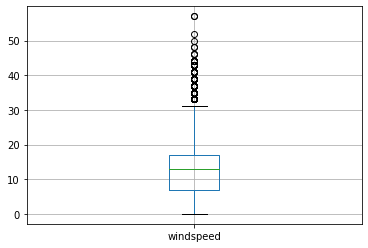

In [68]:
train.boxplot(column='windspeed')

In [69]:
train.windspeed.describe()

count    10886.000000
mean        12.799395
std          8.164537
min          0.000000
25%          7.001500
50%         12.998000
75%         16.997900
max         56.996900
Name: windspeed, dtype: float64

Lets compute IQR to tackle outliers

In [70]:
# Calculate the IQR
Q1 = train['windspeed'].quantile(0.25)
Q3 = train['windspeed'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bridges
lower_bridge = Q1 - (IQR * 1.5)
upper_bridge = Q3 + (IQR * 1.5)

print("Lower Bridge:", lower_bridge)
print("Upper Bridge:", upper_bridge)

# Handling outliers
train.loc[train['windspeed'] > upper_bridge, 'windspeed'] = upper_bridge


Lower Bridge: -7.993100000000002
Upper Bridge: 31.992500000000003


<AxesSubplot:xlabel='windspeed', ylabel='Density'>

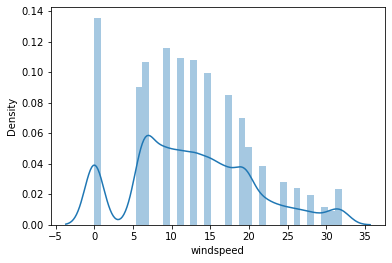

In [71]:
sns.distplot(train['windspeed'], label='windspeed')


## Standardization and Model Building

We dont require Date column as we already extracted month and hour from the respective columns

In [72]:
def drop_columns(df,columns):
    df.drop(columns,axis=1,inplace=True)
    return df

In [73]:
drop_columns(train,["datetime","casual","registered"])

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,month
0,1,0,0,1,9.84,14.395,81,0.0000,16,0,1
1,1,0,0,1,9.02,13.635,80,0.0000,40,1,1
2,1,0,0,1,9.02,13.635,80,0.0000,32,2,1
3,1,0,0,1,9.84,14.395,75,0.0000,13,3,1
4,1,0,0,1,9.84,14.395,75,0.0000,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,336,19,12
10882,4,0,1,1,14.76,17.425,57,15.0013,241,20,12
10883,4,0,1,1,13.94,15.910,61,15.0013,168,21,12
10884,4,0,1,1,13.94,17.425,61,6.0032,129,22,12


In [74]:
drop_columns(test,["datetime"])

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,month
0,1,0,1,1,10.66,11.365,56,26.0027,0,1
1,1,0,1,1,10.66,13.635,56,0.0000,1,1
2,1,0,1,1,10.66,13.635,56,0.0000,2,1
3,1,0,1,1,10.66,12.880,56,11.0014,3,1
4,1,0,1,1,10.66,12.880,56,11.0014,4,1
...,...,...,...,...,...,...,...,...,...,...
6488,1,0,1,2,10.66,12.880,60,11.0014,19,12
6489,1,0,1,2,10.66,12.880,60,11.0014,20,12
6490,1,0,1,1,10.66,12.880,60,11.0014,21,12
6491,1,0,1,1,10.66,13.635,56,8.9981,22,12


In [75]:
from sklearn.preprocessing import MinMaxScaler

In [76]:
def scaling(df):
    scaler=MinMaxScaler()
    num_cols=['temp','atemp','humidity','windspeed']
    df[num_cols]=scaler.fit_transform(df[num_cols])
    return df

In [77]:
train=scaling(train)
test=scaling(test)

### Split the data 

In [78]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train.drop(['count'],axis=1),train['count'],test_size=0.3)

### Define Metric

In [79]:
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

### Model Selection and Training

In [80]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor

In [81]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Random Forest": RandomForestRegressor(),
    "Gradient boosting": GradientBoostingRegressor(),
    "Xg boosting": XGBRegressor()
}

# Assuming x_train, x_test, y_train, y_test are defined

for model_name, model in models.items():
    model.fit(x_train, y_train)  # Train Model
    
    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Calculate performance metrics using the rmsle function
    model_train_accuracy = rmsle(y_train, y_train_pred)
    model_test_accuracy = rmsle(y_test, y_test_pred)
    
    print(model_name)
    print("Model performance for training set:")
    print(f"rmsle: {model_train_accuracy}")
    print("------------------------------")
    print("Model performance for test set:")
    print(f"rmsle: {model_test_accuracy}")
    print("-" * 40)
    print("\n")



Linear Regression
Model performance for training set:
rmsle: 1.2000334105890615
------------------------------
Model performance for test set:
rmsle: 1.191647509526476
----------------------------------------


Ridge
Model performance for training set:
rmsle: 1.1955143468914293
------------------------------
Model performance for test set:
rmsle: 1.1935241452419014
----------------------------------------


Lasso
Model performance for training set:
rmsle: 1.2046745494614308
------------------------------
Model performance for test set:
rmsle: 1.204910625302575
----------------------------------------


Random Forest
Model performance for training set:
rmsle: 0.19583575317176194
------------------------------
Model performance for test set:
rmsle: 0.4272524956353191
----------------------------------------


Gradient boosting
Model performance for training set:
rmsle: 0.6355993601789056
------------------------------
Model performance for test set:
rmsle: 0.6608268345426591
------------

### Hyper parameter Tunning 

From above we can see that for RMSLE metric - Random Forest regressor is performing best compared to other models

### Models for Hyperparameter_tunning

### Randomized_search_CV

In [88]:
n_estimators = [int(x) for x in np.linspace(20, 2000, 10)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(10, 100, 10)]
min_samples_split = [2, 3, 5, 7, 9]  
min_samples_leaf = [1, 2, 4, 6, 8]
rf_params = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
}



In [89]:
randomcv_models=[
    ('Random forest',RandomForestRegressor(),rf_params)
]

In [90]:
randomcv_models

[('Random forest',
  RandomForestRegressor(),
  {'n_estimators': [20, 240, 460, 680, 900, 1120, 1340, 1560, 1780, 2000],
   'max_features': ['auto', 'sqrt', 'log2'],
   'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
   'min_samples_split': [2, 3, 5, 7, 9],
   'min_samples_leaf': [1, 2, 4, 6, 8]})]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

model_param={}
for name,model,params in randomcv_models:
    random=RandomizedSearchCV(estimator=model,
                              param_distributions=params,
                              n_iter=100,
                              cv=3,
                              verbose=2,
                              n_jobs=-1,
                             scoring=rmsle)
    random.fit(x_train,y_train)
    model_param[name]=random.best_params_
    
for model_name in model_param:
    print(f"-------------------Best Params for {model_name}--------------")
    print(model_param[model_name])  


Fitting 3 folds for each of 100 candidates, totalling 300 fits
